<a href="https://colab.research.google.com/github/dhiaserpanggayoga/REMIDI-UTS-KELOMPOK-9/blob/main/REMIDI%20UTS%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset UTS.xlsx - Stok (1).csv to Dataset UTS.xlsx - Stok (1) (1).csv
Saving Dataset UTS.xlsx - Pembelian.csv to Dataset UTS.xlsx - Pembelian (1).csv


In [ ]:
import pandas as pd

# Fungsi bantu untuk membaca CSV fleksibel
def baca_fleksibel(nama_file):
    for sep in [',', ';', '\t', '|', '\s+']:
        try:
            df = pd.read_csv(nama_file, sep=sep, engine='python', on_bad_lines='skip')
            if df.shape[1] > 1:  # kalau kolomnya lebih dari 1 berarti berhasil
                print(f"✅ Berhasil dibaca dengan delimiter: '{sep}'")
                return df
        except Exception as e:
            continue
    print("Gagal mendeteksi delimiter, data masih bermasalah.")
    return None

# Coba baca dua dataset
pembelian = baca_fleksibel('Dataset UTS.xlsx - Pembelian.csv')
stok = baca_fleksibel('Dataset UTS.xlsx - Stok (1).csv')

# Tampilkan hasil awal
if pembelian is not None:
    display(pembelian.head())
if stok is not None:
    display(stok.head())


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-448118285.py:5: SyntaxWarning: invalid escape sequence '\s'
  for sep in [',', ';', '\t', '|', '\s+']:


✅ Berhasil dibaca dengan delimiter: '\s+'
✅ Berhasil dibaca dengan delimiter: '\s+'


,"""KODE_______NAMA",PRODUK__________________________________________________UNIT_________
0,"""",None
1,"""",None
2,"""",None
3,"""",None
4,"""",None


,"""",KODE,NAMA,PRODUK,LOKASI,QTY.STOK,UNIT
0,"""",None,None,None,None,None,None
1,"""",A000001,ANATON,TAB,ETL1,"12,00",STRIP
2,"""",None,None,None,None,None,None
3,"""",A00001,ACTIVED,HIJAU,ETL3A,"2,00",BTL
4,"""",None,None,None,None,None,None


In [ ]:
import pandas as pd

def bersihkan_dataset(df):
    # Buang kolom kosong
    df = df.dropna(axis=1, how='all')

    # Buang baris kosong
    df = df.dropna(axis=0, how='all')

    # Hapus tanda kutip ganda di seluruh isi tabel
    df = df.replace('"', '', regex=True)

    # Reset index
    df = df.reset_index(drop=True)
    return df

# Bersihkan dua dataset
pembelian_bersih = bersihkan_dataset(pembelian)
stok_bersih = bersihkan_dataset(stok)

print("=== Pembelian Setelah Dibersihkan ===")
display(pembelian_bersih.head(10))

print("=== Stok Setelah Dibersihkan ===")
display(stok_bersih.head(10))


=== Pembelian Setelah Dibersihkan ===


,"""KODE_______NAMA",PRODUK__________________________________________________UNIT_________
0,,None
1,,None
2,,None
3,,None
4,,None
5,,None
6,,None
7,,None
8,,None
9,,None


=== Stok Setelah Dibersihkan ===


,"""",KODE,NAMA,PRODUK,LOKASI,QTY.STOK,UNIT
0,,None,None,None,None,None,None
1,,A000001,ANATON,TAB,ETL1,"12,00",STRIP
2,,None,None,None,None,None,None
3,,A00001,ACTIVED,HIJAU,ETL3A,"2,00",BTL
4,,None,None,None,None,None,None
5,,None,None,None,None,None,None
6,,None,None,None,None,None,None
7,,A000016,ALLOPURINOL,300,RAK2,"40,00",STRIP
8,,None,None,None,None,None,None
9,,A000018,ATORVASTATIN,10MG,RAK2,"6,00",STRIP


In [ ]:
import pandas as pd
import re

# Baca file secara mentah dulu (tanpa parsing otomatis)
with open("Dataset UTS.xlsx - Pembelian.csv", "r", encoding="utf-8", errors="ignore") as f:
    lines = f.readlines()

# Bersihkan karakter kutip dan newline
lines = [re.sub(r'"', '', line.strip()) for line in lines if line.strip() != ""]

# Tampilkan beberapa baris pertama untuk kita lihat polanya
for l in lines[:10]:
    print(l)


KODE_______NAMA PRODUK__________________________________________________UNIT_________

  TANGGAL    NO.TRANSAKSI               QTY.MSK    NILAI MSK     QTY.KLR    NILAI KLR

A000001    ANATON TAB                                                   STRIP

  06-07-21   1.13-210706.0908-003         10,00     2.520,00

  12-07-21   2.6-210712.1519-097                                    1,00     3.000,00



In [ ]:
import pandas as pd
import re

# Baca file mentah
with open("Dataset UTS.xlsx - Pembelian.csv", "r", encoding="utf-8", errors="ignore") as f:
    lines = [re.sub(r'"', '', line.strip()) for line in f.readlines() if line.strip() != ""]

data = []
current_kode = None
current_nama = None
current_unit = None

for line in lines:
    # Baris kode produk
    if re.match(r'^[A-Z0-9]+', line) and not re.search(r'\d{2}-\d{2}-\d{2}', line):
        parts = re.split(r'\s{2,}', line.strip())
        if len(parts) >= 2:
            current_kode = parts[0].strip()
            current_nama = " ".join(parts[1:-1]).strip() if len(parts) > 2 else parts[1].strip()
            current_unit = parts[-1].strip()

    # Baris transaksi
    elif re.search(r'\d{2}-\d{2}-\d{2}', line):
        tanggal = re.search(r'\d{2}-\d{2}-\d{2}', line).group(0)
        match_no = re.search(r'\b[12]\.\S+', line)
        no_trans = match_no.group(0) if match_no else None

        # Ambil dua angka terakhir di baris (misal 10,00 dan 2.520,00)
        angka_raw = re.findall(r'\d{1,3}(?:[.,]\d{3})*(?:[.,]\d+)?', line)
        angka = [a.replace(".", "").replace(",", ".") for a in angka_raw]  # ubah ke format float standar

        qty_msk = nilai_msk = qty_klr = nilai_klr = None

        if no_trans and no_trans.startswith("1.") and len(angka) >= 2:
            qty_msk = angka[-2]
            nilai_msk = angka[-1]
        elif no_trans and no_trans.startswith("2.") and len(angka) >= 2:
            qty_klr = angka[-2]
            nilai_klr = angka[-1]

        data.append({
            "KODE": current_kode,
            "NAMA_PRODUK": current_nama,
            "UNIT": current_unit,
            "TANGGAL": tanggal,
            "NO_TRANSAKSI": no_trans,
            "QTY_MSK": qty_msk,
            "NILAI_MSK": nilai_msk,
            "QTY_KLR": qty_klr,
            "NILAI_KLR": nilai_klr
        })

# Buat DataFrame
pembelian_fix = pd.DataFrame(data)

# Konversi ke numerik
for col in ["QTY_MSK", "NILAI_MSK", "QTY_KLR", "NILAI_KLR"]:
    pembelian_fix[col] = pd.to_numeric(pembelian_fix[col], errors="coerce")

display(pembelian_fix.head(15))

,KODE,NAMA_PRODUK,UNIT,TANGGAL,NO_TRANSAKSI,QTY_MSK,NILAI_MSK,QTY_KLR,NILAI_KLR
0,A000001,ANATON TAB,STRIP,06-07-21,1.13-210706.0908-003,10.0,2520.00,NaN,NaN
1,A000001,ANATON TAB,STRIP,12-07-21,2.6-210712.1519-097,NaN,NaN,1.0,3000.0
2,A000001,ANATON TAB,STRIP,12-07-21,2.11-210712.1633-013,NaN,NaN,1.0,3000.0
3,A000001,ANATON TAB,STRIP,12-07-21,2.13-210712.1807-013,NaN,NaN,1.0,3000.0
4,A000001,ANATON TAB,STRIP,12-07-21,2.11-210712.1855-018,NaN,NaN,1.0,3000.0
5,A000001,ANATON TAB,STRIP,12-07-21,2.11-210712.1925-027,NaN,NaN,1.0,3000.0
6,A000001,ANATON TAB,STRIP,12-07-21,2.11-210712.1957-035,NaN,NaN,1.0,3000.0
7,A000001,ANATON TAB,STRIP,12-07-21,2.6-210712.0907-023,NaN,NaN,2.0,3000.0
8,A000001,ANATON TAB,STRIP,13-07-21,2.11-210713.1102-011,NaN,NaN,1.0,3000.0
9,A000001,ANATON TAB,STRIP,13-07-21,2.6-210713.1701-006,NaN,NaN,1.0,4000.0


In [ ]:
import pandas as pd

# Fungsi untuk baca file CSV dengan banyak kemungkinan delimiter
def baca_fleksibel(nama_file):
    for sep in [',', ';', '\t', r'\s+', '|']:
        try:
            df = pd.read_csv(nama_file, sep=sep, engine='python', on_bad_lines='skip', quoting=3)
            if df.shape[1] > 1:  # kalau kolomnya lebih dari 1, berarti berhasil
                print(f"✅ Berhasil dibaca dengan delimiter: {sep}")
                return df
        except Exception as e:
            print(f"❌ Gagal pakai delimiter {sep}: {e}")
            continue
    print("❌ Tidak bisa deteksi delimiter dengan cara otomatis.")
    return None

# Baca dataset stok
stok = baca_fleksibel("Dataset UTS.xlsx - Stok (1).csv")

# Lihat hasilnya
if stok is not None:
    print("Jumlah kolom:", len(stok.columns))
    print("Nama kolom:", stok.columns.tolist())
    display(stok.head(10))

✅ Berhasil dibaca dengan delimiter: \s+
Jumlah kolom: 7
Nama kolom: ['"', 'KODE', 'NAMA', 'PRODUK', 'LOKASI', 'QTY.STOK', 'UNIT']


,"""",KODE,NAMA,PRODUK,LOKASI,QTY.STOK,UNIT
0,"""",None,None,None,None,None,None
1,"""",A000001,ANATON,TAB,ETL1,"12,00",STRIP
2,"""",None,None,None,None,None,None
3,"""",A00001,ACTIVED,HIJAU,ETL3A,"2,00",BTL
4,"""",None,None,None,None,None,None
5,"""",None,None,None,None,None,None
6,"""",None,None,None,None,None,None
7,"""",A000016,ALLOPURINOL,300,RAK2,"40,00",STRIP
8,"""",None,None,None,None,None,None
9,"""",A000018,ATORVASTATIN,10MG,RAK2,"6,00",STRIP


In [ ]:
import pandas as pd

# Bersihkan kolom pertama yang tidak perlu
stok = stok.drop(columns=['"'], errors='ignore')

# Buang baris yang semua kolomnya kosong
stok = stok.dropna(how='all')

# Hapus tanda kutip di seluruh isi tabel
stok = stok.replace('"', '', regex=True)

# Reset index
stok = stok.reset_index(drop=True)

# Ubah format angka dari 12,00 → 12.00
stok['QTY.STOK'] = stok['QTY.STOK'].str.replace(',', '.', regex=False)

# Konversi QTY.STOK ke float
stok['QTY.STOK'] = pd.to_numeric(stok['QTY.STOK'], errors='coerce')

display(stok.head(10))
print("Jumlah data setelah dibersihkan:", len(stok))

,KODE,NAMA,PRODUK,LOKASI,QTY.STOK,UNIT
0,A000001,ANATON,TAB,ETL1,12.0,STRIP
1,A00001,ACTIVED,HIJAU,ETL3A,2.0,BTL
2,A000016,ALLOPURINOL,300,RAK2,40.0,STRIP
3,A000018,ATORVASTATIN,10MG,RAK2,6.0,STRIP
4,A00004,ACYCLOVIR,200MG,RAK2,13.0,STRIP
5,A000040,MEFIX,500MG,RAK1,9.0,STRIP
6,A00005,ACYCLOVIR,400MG,RAK2,21.0,STRIP
7,A000069,ALKOHOL,SWEP,ETL3B,103.0,PSG
8,A000076,ALOFAR,300MG,RAK1,20.0,STRIP
9,A000078,ARKAVIT,BOX,ETL1,10.0,STRIP


Jumlah data setelah dibersihkan: 719


In [ ]:
# Gabungkan berdasarkan KODE
gabung = pd.merge(
    pembelian_fix,
    stok,
    how='left',
    on='KODE'
)

# Lihat hasil gabungan
print("=== Data Gabungan ===")
print("Jumlah baris:", len(gabung))
display(gabung.head(15))

=== Data Gabungan ===
Jumlah baris: 138364


,KODE,NAMA_PRODUK,UNIT_x,TANGGAL,NO_TRANSAKSI,QTY_MSK,NILAI_MSK,QTY_KLR,NILAI_KLR,NAMA,PRODUK,LOKASI,QTY.STOK,UNIT_y
0,A000001,ANATON TAB,STRIP,06-07-21,1.13-210706.0908-003,10.0,2520.00,NaN,NaN,ANATON,TAB,ETL1,12.0,STRIP
1,A000001,ANATON TAB,STRIP,12-07-21,2.6-210712.1519-097,NaN,NaN,1.0,3000.0,ANATON,TAB,ETL1,12.0,STRIP
2,A000001,ANATON TAB,STRIP,12-07-21,2.11-210712.1633-013,NaN,NaN,1.0,3000.0,ANATON,TAB,ETL1,12.0,STRIP
3,A000001,ANATON TAB,STRIP,12-07-21,2.13-210712.1807-013,NaN,NaN,1.0,3000.0,ANATON,TAB,ETL1,12.0,STRIP
4,A000001,ANATON TAB,STRIP,12-07-21,2.11-210712.1855-018,NaN,NaN,1.0,3000.0,ANATON,TAB,ETL1,12.0,STRIP
5,A000001,ANATON TAB,STRIP,12-07-21,2.11-210712.1925-027,NaN,NaN,1.0,3000.0,ANATON,TAB,ETL1,12.0,STRIP
6,A000001,ANATON TAB,STRIP,12-07-21,2.11-210712.1957-035,NaN,NaN,1.0,3000.0,ANATON,TAB,ETL1,12.0,STRIP
7,A000001,ANATON TAB,STRIP,12-07-21,2.6-210712.0907-023,NaN,NaN,2.0,3000.0,ANATON,TAB,ETL1,12.0,STRIP
8,A000001,ANATON TAB,STRIP,13-07-21,2.11-210713.1102-011,NaN,NaN,1.0,3000.0,ANATON,TAB,ETL1,12.0,STRIP
9,A000001,ANATON TAB,STRIP,13-07-21,2.6-210713.1701-006,NaN,NaN,1.0,4000.0,ANATON,TAB,ETL1,12.0,STRIP


In [ ]:
from google.colab import files
import pandas as pd

# Simpan hasil gabungan sebelum imputasi
gabung.to_csv("data_gabungan_sebelum_imputasi.csv", index=False)

# Download langsung
files.download("data_gabungan_sebelum_imputasi.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

# 1️⃣ Baca dataset gabungan sebelum imputasi
df = pd.read_csv("data_gabungan_sebelum_imputasi.csv")

# 2️⃣ Tentukan proporsi missing value (misal 15%)
missing_rate = 0.15  # ubah ke 0.2 atau 0.3 kalau mau lebih banyak

# 3️⃣ Copy dataset untuk modifikasi
df_missing = df.copy()

# 4️⃣ Buat missing value acak di SEMUA kolom
np.random.seed(42)  # biar hasilnya konsisten setiap dijalankan

for col in df_missing.columns:
    n_missing = int(len(df_missing) * missing_rate)
    missing_idx = np.random.choice(df_missing.index, n_missing, replace=False)
    df_missing.loc[missing_idx, col] = np.nan

# 5️⃣ Cek hasil
print("✅ Missing value berhasil dibuat di semua kolom!")
print(df_missing.isna().sum())
display(df_missing.head(10))

# 6️⃣ Simpan & download hasilnya
df_missing.to_csv("data_gabungan_dengan_missing.csv", index=False)
files.download("data_gabungan_dengan_missing.csv")

✅ Missing value berhasil dibuat di semua kolom!
KODE             20754
NAMA_PRODUK      20754
UNIT_x           20754
TANGGAL          20754
NO_TRANSAKSI     22437
QTY_MSK         125065
NILAI_MSK       125084
QTY_KLR          35685
NILAI_KLR        35753
NAMA             65075
PRODUK           65028
LOKASI           65011
QTY.STOK         90015
UNIT_y           87522
dtype: int64


,KODE,NAMA_PRODUK,UNIT_x,TANGGAL,NO_TRANSAKSI,QTY_MSK,NILAI_MSK,QTY_KLR,NILAI_KLR,NAMA,PRODUK,LOKASI,QTY.STOK,UNIT_y
0,NaN,ANATON TAB,STRIP,06-07-21,1.13-210706.0908-003,NaN,2520.0,NaN,NaN,NaN,TAB,ETL1,12.0,STRIP
1,A000001,ANATON TAB,STRIP,12-07-21,2.6-210712.1519-097,NaN,NaN,1.0,3000.0,ANATON,TAB,ETL1,12.0,STRIP
2,A000001,ANATON TAB,STRIP,NaN,2.11-210712.1633-013,NaN,NaN,NaN,3000.0,NaN,TAB,ETL1,12.0,STRIP
3,A000001,ANATON TAB,STRIP,12-07-21,2.13-210712.1807-013,NaN,NaN,1.0,3000.0,ANATON,TAB,ETL1,12.0,STRIP
4,A000001,ANATON TAB,STRIP,12-07-21,2.11-210712.1855-018,NaN,NaN,1.0,3000.0,NaN,TAB,ETL1,12.0,STRIP
5,A000001,ANATON TAB,STRIP,12-07-21,2.11-210712.1925-027,NaN,NaN,1.0,3000.0,NaN,TAB,ETL1,12.0,NaN
6,A000001,ANATON TAB,STRIP,12-07-21,2.11-210712.1957-035,NaN,NaN,1.0,3000.0,ANATON,TAB,ETL1,12.0,STRIP
7,A000001,ANATON TAB,STRIP,NaN,NaN,NaN,NaN,NaN,3000.0,ANATON,TAB,ETL1,12.0,STRIP
8,A000001,ANATON TAB,STRIP,13-07-21,2.11-210713.1102-011,NaN,NaN,1.0,3000.0,ANATON,NaN,ETL1,12.0,STRIP
9,A000001,ANATON TAB,STRIP,13-07-21,2.6-210713.1701-006,NaN,NaN,1.0,NaN,ANATON,TAB,ETL1,NaN,NaN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca data hasil missing
df = pd.read_csv("data_gabungan_dengan_missing.csv")

# Tampilkan 10 baris pertama
print("=== Contoh Data Sebelum Imputasi (10 Baris Pertama) ===")
display(df.head(10))

=== Contoh Data Sebelum Imputasi (10 Baris Pertama) ===


,KODE,NAMA_PRODUK,UNIT_x,TANGGAL,NO_TRANSAKSI,QTY_MSK,NILAI_MSK,QTY_KLR,NILAI_KLR,NAMA,PRODUK,LOKASI,QTY.STOK,UNIT_y
0,NaN,ANATON TAB,STRIP,06-07-21,1.13-210706.0908-003,NaN,2520.0,NaN,NaN,NaN,TAB,ETL1,12.0,STRIP
1,A000001,ANATON TAB,STRIP,12-07-21,2.6-210712.1519-097,NaN,NaN,1.0,3000.0,ANATON,TAB,ETL1,12.0,STRIP
2,A000001,ANATON TAB,STRIP,NaN,2.11-210712.1633-013,NaN,NaN,NaN,3000.0,NaN,TAB,ETL1,12.0,STRIP
3,A000001,ANATON TAB,STRIP,12-07-21,2.13-210712.1807-013,NaN,NaN,1.0,3000.0,ANATON,TAB,ETL1,12.0,STRIP
4,A000001,ANATON TAB,STRIP,12-07-21,2.11-210712.1855-018,NaN,NaN,1.0,3000.0,NaN,TAB,ETL1,12.0,STRIP
5,A000001,ANATON TAB,STRIP,12-07-21,2.11-210712.1925-027,NaN,NaN,1.0,3000.0,NaN,TAB,ETL1,12.0,NaN
6,A000001,ANATON TAB,STRIP,12-07-21,2.11-210712.1957-035,NaN,NaN,1.0,3000.0,ANATON,TAB,ETL1,12.0,STRIP
7,A000001,ANATON TAB,STRIP,NaN,NaN,NaN,NaN,NaN,3000.0,ANATON,TAB,ETL1,12.0,STRIP
8,A000001,ANATON TAB,STRIP,13-07-21,2.11-210713.1102-011,NaN,NaN,1.0,3000.0,ANATON,NaN,ETL1,12.0,STRIP
9,A000001,ANATON TAB,STRIP,13-07-21,2.6-210713.1701-006,NaN,NaN,1.0,NaN,ANATON,TAB,ETL1,NaN,NaN


In [ ]:
print("\n=== Jumlah Missing Value per Kolom ===")
missing_count = df.isna().sum()
missing_percent = (missing_count / len(df)) * 100

missing_table = pd.DataFrame({
    'Jumlah Missing': missing_count,
    'Persentase (%)': missing_percent.round(2)
}).sort_values(by='Jumlah Missing', ascending=False)

display(missing_table)


=== Jumlah Missing Value per Kolom ===


,Jumlah Missing,Persentase (%)
NILAI_MSK,125084,90.40
QTY_MSK,125065,90.39
QTY.STOK,90015,65.06
UNIT_y,87522,63.25
NAMA,65075,47.03
PRODUK,65028,47.00
LOKASI,65011,46.99
NILAI_KLR,35753,25.84
QTY_KLR,35685,25.79
NO_TRANSAKSI,22437,16.22


/tmp/ipython-input-294545701.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_table.index, y=missing_table['Jumlah Missing'], palette='coolwarm')


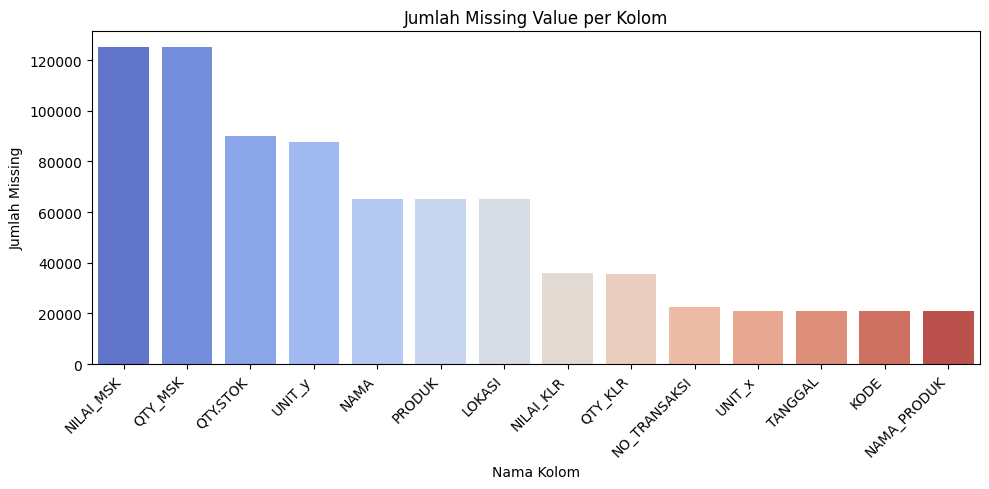

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=missing_table.index, y=missing_table['Jumlah Missing'], palette='coolwarm')
plt.title("Jumlah Missing Value per Kolom")
plt.xlabel("Nama Kolom")
plt.ylabel("Jumlah Missing")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df_mean = df.copy()

for col in df_mean.columns:
    if df_mean[col].dtype in ['float64', 'int64']:
        df_mean[col] = df_mean[col].fillna(df_mean[col].mean())
    else:
        mode_val = df_mean[col].mode().iloc[0] if not df_mean[col].mode().empty else None
        df_mean[col] = df_mean[col].fillna(mode_val)

print("✅ Imputasi Mean/Mode selesai!")
print(df_mean.head(10))

✅ Imputasi Mean/Mode selesai!
       KODE NAMA_PRODUK UNIT_x   TANGGAL          NO_TRANSAKSI    QTY_MSK  \
0  M0000100  ANATON TAB  STRIP  06-07-21  1.13-210706.0908-003  20.558162   
1   A000001  ANATON TAB  STRIP  12-07-21   2.6-210712.1519-097  20.558162   
2   A000001  ANATON TAB  STRIP  29-04-21  2.11-210712.1633-013  20.558162   
3   A000001  ANATON TAB  STRIP  12-07-21  2.13-210712.1807-013  20.558162   
4   A000001  ANATON TAB  STRIP  12-07-21  2.11-210712.1855-018  20.558162   
5   A000001  ANATON TAB  STRIP  12-07-21  2.11-210712.1925-027  20.558162   
6   A000001  ANATON TAB  STRIP  12-07-21  2.11-210712.1957-035  20.558162   
7   A000001  ANATON TAB  STRIP  29-04-21  2.13-210128.0209-001  20.558162   
8   A000001  ANATON TAB  STRIP  13-07-21  2.11-210713.1102-011  20.558162   
9   A000001  ANATON TAB  STRIP  13-07-21   2.6-210713.1701-006  20.558162   

      NILAI_MSK   QTY_KLR     NILAI_KLR     NAMA PRODUK LOKASI   QTY.STOK  \
0   2520.000000  2.518305  10019.707331  MIRA

In [ ]:
df_kmeans = df.copy()

# Pilih kolom numerik saja untuk K-Means
num_cols = df_kmeans.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()

# Hanya jika ada kolom numerik
if len(num_cols) > 0:
    # Normalisasi data numerik
    scaled = scaler.fit_transform(df_kmeans[num_cols])

    # Ganti NaN dengan 0 untuk sementara
    scaled = np.nan_to_num(scaled)

    # Tentukan jumlah cluster optimal (misal 3)
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    df_kmeans["Cluster"] = kmeans.fit_predict(scaled)

    # Untuk tiap cluster, isi missing value numerik dengan rata-rata cluster
    for col in num_cols:
        for c in df_kmeans["Cluster"].unique():
            cluster_mean = df_kmeans.loc[df_kmeans["Cluster"] == c, col].mean()
            df_kmeans.loc[(df_kmeans["Cluster"] == c) & (df_kmeans[col].isna()), col] = cluster_mean

# Isi kolom kategorikal dengan mode
for col in df_kmeans.columns:
    if df_kmeans[col].dtype == 'object':
        mode_val = df_kmeans[col].mode().iloc[0] if not df_kmeans[col].mode().empty else None
        df_kmeans[col] = df_kmeans[col].fillna(mode_val)

print("✅ Imputasi K-Means + Mode selesai!")
print(df_kmeans.head(10))

✅ Imputasi K-Means + Mode selesai!
       KODE NAMA_PRODUK UNIT_x   TANGGAL          NO_TRANSAKSI    QTY_MSK  \
0  M0000100  ANATON TAB  STRIP  06-07-21  1.13-210706.0908-003  20.558162   
1   A000001  ANATON TAB  STRIP  12-07-21   2.6-210712.1519-097  20.558162   
2   A000001  ANATON TAB  STRIP  29-04-21  2.11-210712.1633-013  20.558162   
3   A000001  ANATON TAB  STRIP  12-07-21  2.13-210712.1807-013  20.558162   
4   A000001  ANATON TAB  STRIP  12-07-21  2.11-210712.1855-018  20.558162   
5   A000001  ANATON TAB  STRIP  12-07-21  2.11-210712.1925-027  20.558162   
6   A000001  ANATON TAB  STRIP  12-07-21  2.11-210712.1957-035  20.558162   
7   A000001  ANATON TAB  STRIP  29-04-21  2.13-210128.0209-001  20.558162   
8   A000001  ANATON TAB  STRIP  13-07-21  2.11-210713.1102-011  20.558162   
9   A000001  ANATON TAB  STRIP  13-07-21   2.6-210713.1701-006  20.558162   

      NILAI_MSK   QTY_KLR    NILAI_KLR     NAMA PRODUK LOKASI   QTY.STOK  \
0   2520.000000  2.146415  7358.755515  M

In [ ]:
df_mode = df.copy()

for col in df_mode.columns:
    mode_val = df_mode[col].mode().iloc[0] if not df_mode[col].mode().empty else None
    df_mode[col] = df_mode[col].fillna(mode_val)

print("✅ Imputasi Most Frequent selesai!")
print(df_mode.head(10))

✅ Imputasi Most Frequent selesai!
       KODE NAMA_PRODUK UNIT_x   TANGGAL          NO_TRANSAKSI  QTY_MSK  \
0  M0000100  ANATON TAB  STRIP  06-07-21  1.13-210706.0908-003      3.0   
1   A000001  ANATON TAB  STRIP  12-07-21   2.6-210712.1519-097      3.0   
2   A000001  ANATON TAB  STRIP  29-04-21  2.11-210712.1633-013      3.0   
3   A000001  ANATON TAB  STRIP  12-07-21  2.13-210712.1807-013      3.0   
4   A000001  ANATON TAB  STRIP  12-07-21  2.11-210712.1855-018      3.0   
5   A000001  ANATON TAB  STRIP  12-07-21  2.11-210712.1925-027      3.0   
6   A000001  ANATON TAB  STRIP  12-07-21  2.11-210712.1957-035      3.0   
7   A000001  ANATON TAB  STRIP  29-04-21  2.13-210128.0209-001      3.0   
8   A000001  ANATON TAB  STRIP  13-07-21  2.11-210713.1102-011      3.0   
9   A000001  ANATON TAB  STRIP  13-07-21   2.6-210713.1701-006      3.0   

   NILAI_MSK  QTY_KLR  NILAI_KLR     NAMA PRODUK LOKASI  QTY.STOK UNIT_y  
0     2520.0      1.0     3000.0  MIRASIC    TAB   ETL1      12.0

In [ ]:
missing_compare = pd.DataFrame({
    "Sebelum Imputasi": df.isna().sum(),
    "Mean/Mode": df_mean.isna().sum(),
    "Most Frequent": df_mode.isna().sum(),
    "K-Means + Mode": df_kmeans.isna().sum()
})

print("=== Perbandingan Jumlah Missing Value ===")
print(missing_compare)

=== Perbandingan Jumlah Missing Value ===
              Sebelum Imputasi  Mean/Mode  Most Frequent  K-Means + Mode
Cluster                    NaN        NaN            NaN               0
KODE                   20754.0        0.0            0.0               0
LOKASI                 65011.0        0.0            0.0               0
NAMA                   65075.0        0.0            0.0               0
NAMA_PRODUK            20754.0        0.0            0.0               0
NILAI_KLR              35753.0        0.0            0.0               0
NILAI_MSK             125084.0        0.0            0.0            7473
NO_TRANSAKSI           22437.0        0.0            0.0               0
PRODUK                 65028.0        0.0            0.0               0
QTY.STOK               90015.0        0.0            0.0               0
QTY_KLR                35685.0        0.0            0.0               0
QTY_MSK               125065.0        0.0            0.0            7473
TANGGAL  

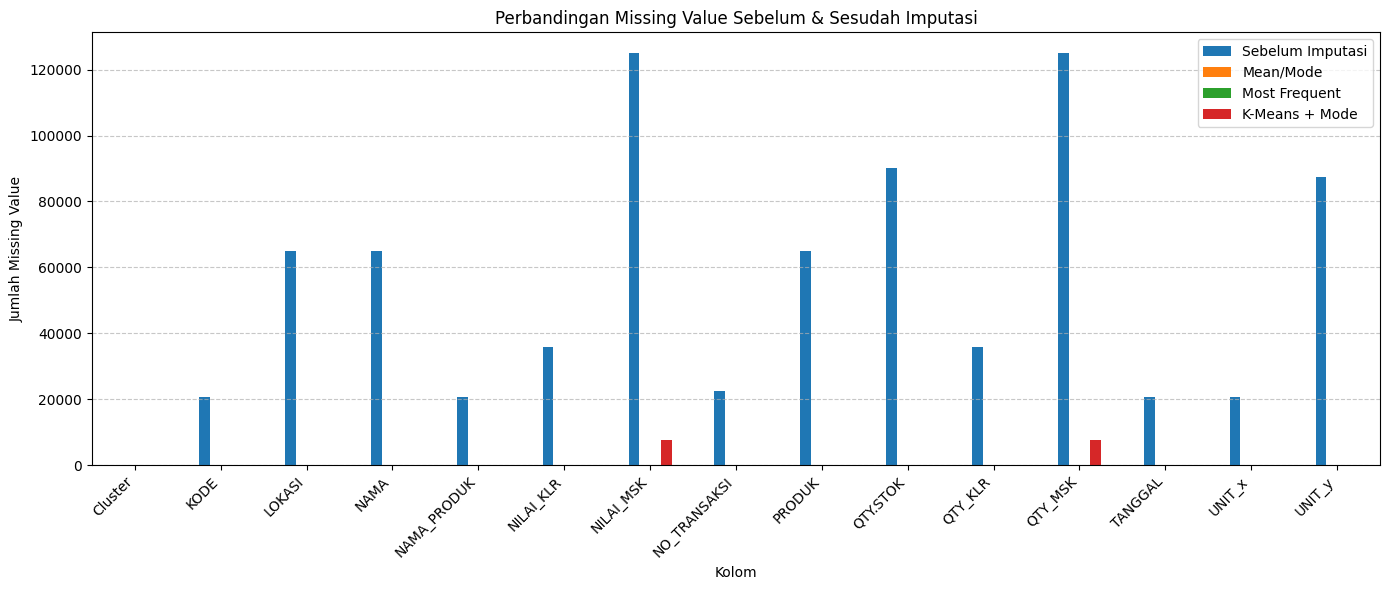

In [ ]:
missing_compare.plot(
    kind='bar',
    figsize=(14,6),
    title="Perbandingan Missing Value Sebelum & Sesudah Imputasi",
    ylabel="Jumlah Missing Value",
    xlabel="Kolom"
)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**PEMBUATAN MODEL ML UNTUK MENENTUKAN IMPUATSI TERBAIK UNTUK KOLOM KATEGORIKAL DAN NUMERIK**

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, accuracy_score
from IPython.display import clear_output

In [ ]:
df = pd.read_csv("/content/data_gabungan_sebelum_imputasi.csv")

# Sampling biar cepat (10% data)
if len(df) > 5000:
    df = df.sample(frac=0.1, random_state=42)

print("=== Contoh Data Asli ===")
display(df.head(5))
print("\nJumlah Missing Value per Kolom:")
display(df.isna().sum())

# Pisahkan kolom numerik & kategorikal
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

print(f"\n Kolom Numerik: {list(num_cols)}")
print(f" Kolom Kategorikal: {list(cat_cols)}")

=== Contoh Data Asli ===


,KODE,NAMA_PRODUK,UNIT_x,TANGGAL,NO_TRANSAKSI,QTY_MSK,NILAI_MSK,QTY_KLR,NILAI_KLR,NAMA,PRODUK,LOKASI,QTY.STOK,UNIT_y
90116,N0000034,NEURODEX 200,STRIP,30-06-21,2.11-210630.1045-012,NaN,NaN,1.0,6500.0,NEURODEX,200,ETL1,7.0,STRIP
40911,F0000081,FARSIFEN 400MG TAB,STRIP,10-08-21,2.11-210810.1606-059,NaN,NaN,1.0,5000.0,NaN,NaN,NaN,NaN,NaN
55445,I0000017,IPI C,BTL,16-12-21,2.13-211216.1742-126,NaN,NaN,1.0,6000.0,NaN,NaN,NaN,NaN,NaN
79760,M0000100,MIRASIC,STRIP,09-07-21,2.11-210709.1706-122,NaN,NaN,1.0,3000.0,MIRASIC,ETL1,"94,00",NaN,NaN
66435,L0000017,LANSET,PCS,19-08-21,2.11-210819.1652-077,NaN,NaN,1.0,1500.0,LANSET,MEJA,"391,00",NaN,NaN



Jumlah Missing Value per Kolom:


,0
KODE,0
NAMA_PRODUK,0
UNIT_x,0
TANGGAL,0
NO_TRANSAKSI,209
QTY_MSK,12281
NILAI_MSK,12281
QTY_KLR,1764
NILAI_KLR,1764
NAMA,5140



 Kolom Numerik: ['QTY_MSK', 'NILAI_MSK', 'QTY_KLR', 'NILAI_KLR', 'QTY.STOK']
 Kolom Kategorikal: ['KODE', 'NAMA_PRODUK', 'UNIT_x', 'TANGGAL', 'NO_TRANSAKSI', 'NAMA', 'PRODUK', 'LOKASI', 'UNIT_y']


In [ ]:
def imputasi_mean(X):
    return pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(X), columns=X.columns)

def imputasi_median(X):
    return pd.DataFrame(SimpleImputer(strategy='median').fit_transform(X), columns=X.columns)

def imputasi_mode(X):
    return pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(X), columns=X.columns)

def imputasi_kmeans(X):
    X_copy = X.copy()
    scaler = StandardScaler()
    scaled = scaler.fit_transform(np.nan_to_num(X_copy))
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(scaled)
    X_copy["Cluster"] = clusters
    for col in X_copy.columns[:-1]:
        for c in np.unique(clusters):
            mean_val = X_copy.loc[X_copy["Cluster"] == c, col].mean()
            X_copy.loc[(X_copy["Cluster"] == c) & (X_copy[col].isna()), col] = mean_val
    return X_copy.drop(columns=["Cluster"])

In [ ]:
numeric_methods = {
    "Mean": imputasi_mean,
    "Median": imputasi_median,
    "KMeans": imputasi_kmeans
}

categorical_methods = {
    "Mode": imputasi_mode
}

In [ ]:
results = []
total_epochs = len(numeric_methods) * len(categorical_methods)
epoch = 0

for num_name, num_func in numeric_methods.items():
    for cat_name, cat_func in categorical_methods.items():
        epoch += 1
        clear_output(wait=True)
        print(f"==============================")
        print(f"Epoch {epoch}/{total_epochs}")
        print(f"Metode Numerik: {num_name} | Kategorikal: {cat_name}")
        print(f"==============================\n")

        df_temp = df.copy()

        # Imputasi numerik & kategorikal
        df_temp[num_cols] = num_func(df_temp[num_cols])
        df_temp[cat_cols] = cat_func(df_temp[cat_cols])

        # Label encoding
        for col in cat_cols:
            le = LabelEncoder()
            df_temp[col] = le.fit_transform(df_temp[col].astype(str))

        # Hilangkan NaN sisa (kalau ada)
        df_temp = df_temp.fillna(0)

        # Pisah fitur & target
        target_col = num_cols[-1] if len(num_cols) > 0 else df_temp.columns[-1]
        X = df_temp.drop(columns=[target_col])
        y = df_temp[target_col]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Pilih model ringan
        if len(np.unique(y)) > 10:
            model = LinearRegression()
            tipe = "Regresi"
        else:
            model = LogisticRegression(max_iter=200)
            tipe = "Klasifikasi"

        print(f"Training model {tipe} untuk kombinasi imputasi...")
        for i in range(1, 6):
            time.sleep(0.4)
            print(f"  Epoch {i}/5 ...")

        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        score = r2_score(y_test, preds) if tipe == "Regresi" else accuracy_score(y_test, preds)

        print(f"\n✅ Kombinasi {num_name} + {cat_name} → Skor: {score:.4f}\n")
        results.append({"Numerik": num_name, "Kategorikal": cat_name, "Score": score})
        time.sleep(1.5)

Epoch 3/3
Metode Numerik: KMeans | Kategorikal: Mode

Training model Regresi untuk kombinasi imputasi...
  Epoch 1/5 ...
  Epoch 2/5 ...
  Epoch 3/5 ...
  Epoch 4/5 ...
  Epoch 5/5 ...

✅ Kombinasi KMeans + Mode → Skor: 0.3614



In [ ]:
clear_output(wait=True)
results_df = pd.DataFrame(results).sort_values(by="Score", ascending=False).reset_index(drop=True)

print("=== 📊 Hasil Evaluasi Kombinasi Imputasi ===")
display(results_df)

best_combo = results_df.iloc[0]
print(f"\n Kombinasi Terbaik:")
print(f"   • Numerik     : {best_combo['Numerik']}")
print(f"   • Kategorikal : {best_combo['Kategorikal']}")
print(f"   • Skor Model  : {best_combo['Score']:.4f}")

=== 📊 Hasil Evaluasi Kombinasi Imputasi ===


,Numerik,Kategorikal,Score
0,Mean,Mode,0.411265
1,KMeans,Mode,0.361416
2,Median,Mode,0.247082



 Kombinasi Terbaik:
   • Numerik     : Mean
   • Kategorikal : Mode
   • Skor Model  : 0.4113


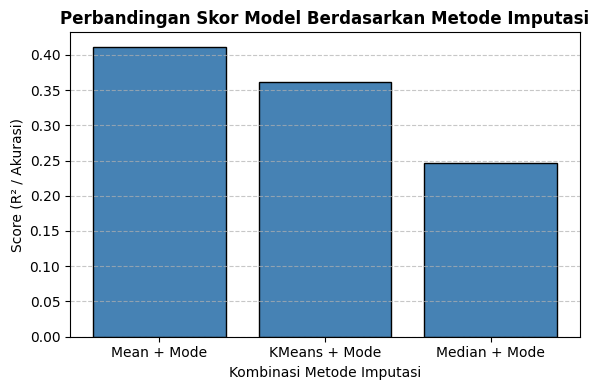

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(
    results_df["Numerik"] + " + " + results_df["Kategorikal"],
    results_df["Score"],
    color="steelblue",
    edgecolor="black"
)

plt.title("Perbandingan Skor Model Berdasarkan Metode Imputasi", fontsize=12, fontweight="bold")
plt.xlabel("Kombinasi Metode Imputasi", fontsize=10)
plt.ylabel("Score (R² / Akurasi)", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()